# Análisis tienda ICE

## Descripción del proyecto 
---

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.


### Objetivo 

El objetivo de este proyecto es identificar los factores que determinan el éxito de los videojuegos en función de diversas características y métricas de ventas en distintas plataformas y regiones.

Las acciones a realizar: 
- Paso 1: Cargar y explorar los datos
- Paso 2: Manipulación de datos
- Paso 3: Análisis de datos
- Paso 4: Pruebas de hipótesis

## Cargar y explorar los datos
---

En esta sección, comenzaremos cargando las bibliotecas necesarias y los datos proporcionados. Luego, realizaremos una exploración inicial del conjunto de datos para comprender su estructura. Esto incluirá:

- Verificar el tamaño del dataset (número de filas y columnas)
- Examinar los tipos de datos en cada columna
- Identificar la presencia de valores faltantes o atípicos que puedan requerir tratamiento antes de proceder con el análisis.

### Cargar ambiente
Importamos las bibliotecas esenciales para el análisis.

In [1]:
## Cargar el ambiente de trabajo
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Cargar dataset
Leemos el archivo de datos proporcionad por analizar. 

In [2]:
# cargar los datos
df_games = pd.read_csv("../data/games.csv")

### Exploración del dataset
En esta etapa, realizaremos un análisis preliminar del dataset para comprender su estructura y calidad. 

In [3]:
## Visualización del df
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
## Información general
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Valores duplicados exoplícitos
print(df_games.duplicated().sum())

## Identificación de los valores duplicados
df_games[df_games.duplicated()]

0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [6]:
# Valores duplicados implícitos
## Número de juegos repetidos
df_games.duplicated(subset = "Name").sum()

games_duplicated = df_games[df_games.duplicated(subset = "Name")].sort_values("Name")

print("Número de juegos repetidos:", len(games_duplicated))
print("Número de juegos únicos repetidos:", games_duplicated["Name"].nunique())

Número de juegos repetidos: 5155
Número de juegos únicos repetidos: 2805


In [7]:
## Valores faltantes
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
## Estadística descriptiva para columnas numéricas
round(df_games.describe(),2)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [9]:
## Estadísticas descriptivas para columnas categóricas
df_games.describe(include="object")

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Resumen 

El DataFrame de Ice contiene 16,715 observaciones y 11 variables, proporciona datos sobre el lanzamiento de videojuegos y las ganancia en 3 principales mercados: Norteamérica, Europa y Japón. 

Durante la exploración inicial, identificamos los siguientes problemas: 

- Los nombres de las columnas se encuentran en *snake case* con mayúsculas.
- La columna `Year_of_Release` se encuentra en formato float. 
- La columna `User_Score` se encuentra como objeto. 

En general, no encontramos datos duplicados explícitos. Sin embargo, al analizar la variable `Name` para duplicados implícitos, encontramos 5,155 casos en los que un mismo videojuego se distribuye en distintas plataformas. Esto sugiere que los datos no están en formato tidy, ya que cada fila no representa una observación única en sí misma. 

Respecto a los valores faltantes: 
- Las variables `Name`, `Genre` y `Year_of_Release` presentan ausencias en escasos registros, representando menos del 5% de los datos. 
- Las variables como `Critic_Score`, `User_Score` y `Rating` muestran entre un 40% y 55% de valores faltantes.  

De manera preliminar, notamos que el juego con mayor distribución entre plataformas el Need for Spped: Most Wantes; la plataforma con un mayor número de videojuegos es la PS2; el género más representativo es de Acción. En cuanto a la clasificación, la más frecuente es la E, lo que indica una preferencia del mercado hacia juegos para toda la familia. 

El mercado estadounidense tiene en promedio el mayor número de ventas. En este mercado se registó el valor máximo de ventas. 

## Manipulación de datos
---

En esta etapa, abordamos los errores identificados en el DataFrame, lo que nos permite preparar los datos para un análisis más adecuado.

Los errores observados fueron los siguientes: 
- Los nombres de las columnas se encuentran en *snake case* con mayúsculas.
- La columna `Year_of_Release` se encuentra en formato float. 
- La columna `User_Score` se encuentra como objeto. 
- Las variables `Name`, `Genre` y `Year_of_Release` presentan ausencias en escasos registros, representando menos del 5% de los datos. 
- Las variables como `Critic_Score`, `User_Score` y `Rating` muestran entre un 40% y 55% de valores faltantes.  

### Correciones de formato

1. Correción del formato *snake case* con mayúsculas a minúsculas.

In [10]:
## Poner en minúsculas los nombres de las columnas
df_games.columns = df_games.columns.str.lower()

2. Conversión de la variable `year_of_release` de tipo float a fecha. 

In [11]:
## Convertir a formato fecha
df_games["year_of_release"] = pd.to_datetime(df_games["year_of_release"], format="%Y").dt.year

> EL resultado de la conversión fue tipo float nuevamente. 

3. Conversión de la variable `user_score` de tipo object a tipo float.

In [12]:
## Convertir a formato float
df_games["user_score"]= pd.to_numeric(df_games["user_score"], errors="coerce")

### Valores faltantes

1. Inspección de la variable `name`

In [13]:
# Inspección valores faltantes Name
## Identificar los videojuegos sin registro
df_games[df_games["name"].isna()]

## Rellenar los valores por Unknown
df_games["name"]= df_games["name"].fillna("Unknown")

1. Inspección de la variable `genre`

In [14]:
# Inspección valores faltantes Genre
## Identificar los videojuegos sin registro
df_games[df_games["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Al inspeccionar los datos, encontramos un videojuego sin nombre pero con los demás metadatos completos, por lo que reemplazamos el valor NaN en el nombre por `Unknown`.
 
Sin embargo, este mismo videojuego carece de datos en la columna de género. Es posible que esta falta de información esté relacionada con su antigüedad (1993) y limitaciones de los registros disponibles. Considerando que estos datos representan menos del 1% del total, hemos decidido eliminarlos del análisis para mantener la integridad y consistencia de los resultados

In [15]:
## Eliminar los registros de los videojuegos sin nombre
df_games= df_games[~(df_games["name"] == "Unknown")] 

3. Inspección de la variable `year_of_release`

In [ ]:
# Inspección valores faltantes año 
## Identificar patrones en el año de lanzamiento
df_games[df_games["year_of_release"].isna()].sort_values(["platform", "genre"]).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1585,Combat,2600,NaN,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN
4220,Circus Atari,2600,NaN,Action,0.43,0.03,0.0,0.00,NaN,NaN,NaN
4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.0,0.00,NaN,NaN,NaN
5800,Slot Machine,2600,NaN,Action,0.29,0.02,0.0,0.00,NaN,NaN,NaN
6299,Flag Capture,2600,NaN,Action,0.25,0.02,0.0,0.00,NaN,NaN,NaN


In [ ]:
df_games[df_games["year_of_release"].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13195,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.0,0.01,46.0,7.6,NaN
12896,Captain America: Super Soldier,Wii,NaN,Action,0.05,0.00,0.0,0.00,57.0,6.0,T
5932,Shrek the Third,DS,NaN,Action,0.26,0.01,0.0,0.02,70.0,6.5,E
11550,Get Fit with Mel B,X360,NaN,Sports,0.00,0.06,0.0,0.01,57.0,NaN,E
4848,Harvest Moon: Save the Homeland,PS2,NaN,Simulation,0.19,0.15,0.0,0.05,76.0,8.8,E
6818,BioShock 2,PC,NaN,Shooter,0.02,0.19,0.0,0.04,88.0,8.0,M
4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.0,0.00,NaN,NaN,NaN
8884,eJay Clubworld,PS2,NaN,Misc,0.07,0.06,0.0,0.02,69.0,8.6,E
6636,Jonah Lomu Rugby Challenge,PS3,NaN,Sports,0.00,0.19,0.0,0.06,64.0,NaN,E
12217,Rayman Arena,XB,NaN,Racing,0.05,0.01,0.0,0.00,50.0,NaN,E


En los datos de la variable `year_of_release`, no observamos un patrón específico de años de lanzamiento; los videojuegos incluyen plataformas antiguas como el Atari 2600 y actuales como el Wii. Dado que los valores ausentes en esta columna representan solo el 2% de los datos, hemos decidido no imputarlos, ya que su impacto en el análisis es mínimo y evitamos introducir posibles sesgos. 

4. Inspección de la variable `critic_score`. 

In [ ]:
# Inspección valores faltantes critic_score
## Identificar los videojuegos sin registro
df_games[df_games["critic_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Para la variable `critic_score`, realizamos una exploración visual mediante un histograma.

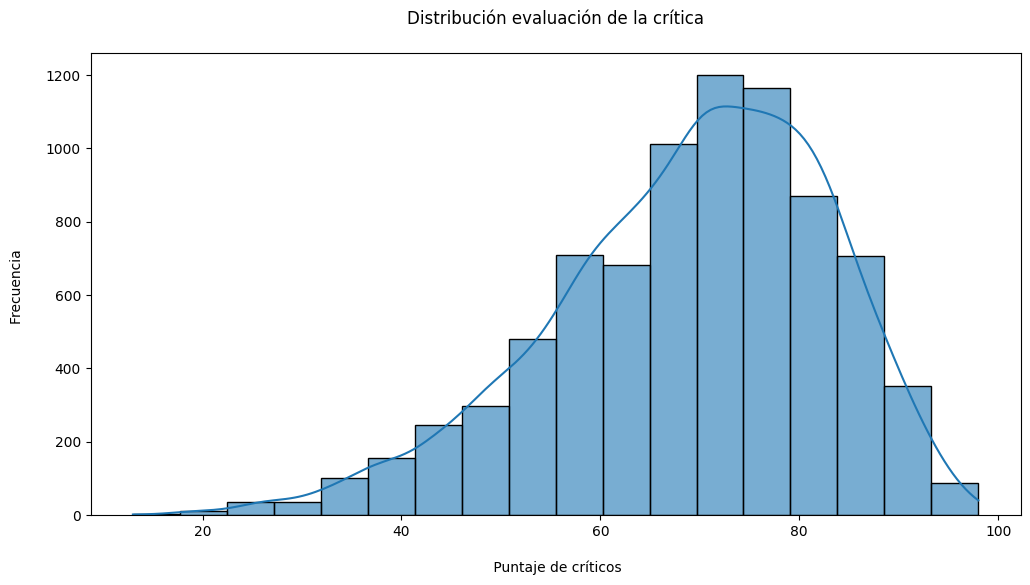

In [19]:
# Observar la distribución de la variable
## Crea el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_games, 
            x="critic_score",
            kde= True, bins=18,alpha=0.6)
plt.title("Distribución evaluación de la crítica\n")
plt.xlabel(" \n Puntaje de críticos")
plt.ylabel("Frecuencia \n")
plt.show()

Dado que los valores de la media y la mediana son casi idénticos y la distribución se aproxima a una normal, decidimos imputar los valores ausentes utilizando el promedio, lo que nos permite no perder una parte considerable de los datos para analizar.

In [20]:
# Imputar los valores ausentes
## Determinar el promedio 
critic_score_mean= df_games["critic_score"].mean(skipna=True)

## Rellenar los valores ausentes con el promedio
df_games.loc[:,"critic_score"]= df_games["critic_score"].fillna(critic_score_mean)

5. Inspección de la variable `user_score`

In [ ]:
# Inspección valores faltantes user_score
## Identificar los videojuegos sin registro
df_games[df_games["user_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.967679,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68.967679,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,68.967679,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,68.967679,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,68.967679,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.967679,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.967679,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68.967679,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,68.967679,NaN,NaN


En la variable `user_score`, notamos que el valor más frecuente es `tbd`, que indica que el puntaje no ha sido determinado. Si etiquetáramos estos valores de esta manera, perderíamos más de la mitad de los datos (51%), lo que afectaría significativamente el análisis

Al revisar el resumen descriptivo y el histograma, observamos que los datos se asemejan a una distribución normal, aunque presentan un sesgo negativo. 

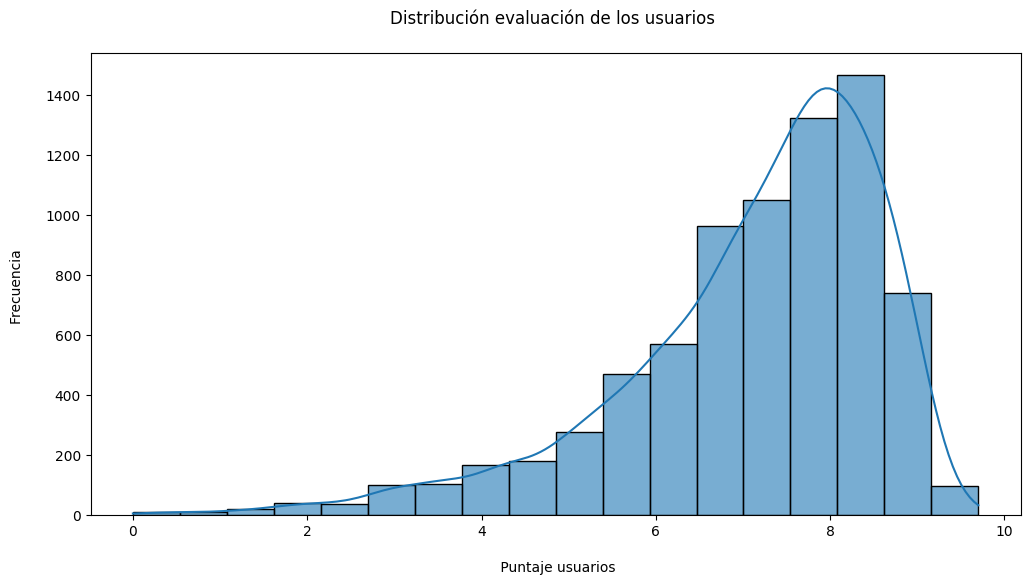

In [22]:
# Observar la distribución de la variable
## Crea el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_games, 
            x="user_score",
            kde= True, bins=18,alpha=0.6)
plt.title("Distribución evaluación de los usuarios \n")
plt.xlabel(" \n Puntaje usuarios")
plt.ylabel("Frecuencia \n")
plt.show()

Por lo tanto, decidimos imputar los valores ausentes utilizando la mediana, lo que nos permitirá mantener los datos para realizar nuestro análisis.

In [23]:
# Imputar los valores ausentes
## Determinar la mediana 
user_score_median= df_games["user_score"].median(skipna=True)

## Rellenar los valores ausentes con el promedio
df_games.loc[:,"user_score"]= df_games["user_score"].fillna(user_score_median)

6. Inspección de la variable `rating`. 

In [24]:
# Imputar los valores ausentes
## Rellenar valores con "tbd"
df_games["rating"] = df_games["rating"].fillna("tbd")

Dado que un 40% de los datos aún no tienen una clasificación asignada, decidimos etiquetar los valores faltantes como `tbd`, en espera de una futura asignación. Optamos por no imputar estos datos, ya que la clasificación ESRB debe ser proporcionada por la Junta de Clasificación de Software de Entretenimiento, representando información sensible. Además, al tratarse de datos categóricos, es apropiado mantener la etiqueta como "en espera" o `tbd` hasta que se determinen.

Finalmente, previo al análisis de los datos decidimos convertir el DataFrame en formato tidy para los posteriores análisis. 

In [25]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [26]:
## Conversión a formato Tiddy
tidy_games = df_games.melt(id_vars=
                        ["name", "platform", "year_of_release", "genre",
                        "critic_score", "user_score", "rating"],
                value_vars=["na_sales", "eu_sales", "jp_sales", "other_sales"],
                var_name="region",
                value_name="sales")

In [27]:
tidy_games

,name,platform,year_of_release,genre,critic_score,user_score,rating,region,sales
0,Wii Sports,Wii,2006.0,Sports,76.000000,8.0,E,na_sales,41.36
1,Super Mario Bros.,NES,1985.0,Platform,68.967679,7.5,tbd,na_sales,29.08
2,Mario Kart Wii,Wii,2008.0,Racing,82.000000,8.3,E,na_sales,15.68
3,Wii Sports Resort,Wii,2009.0,Sports,80.000000,8.0,E,na_sales,15.61
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,68.967679,7.5,tbd,na_sales,11.27
...,...,...,...,...,...,...,...,...,...
66847,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,68.967679,7.5,tbd,other_sales,0.00
66848,LMA Manager 2007,X360,2006.0,Sports,68.967679,7.5,tbd,other_sales,0.00
66849,Haitaka no Psychedelica,PSV,2016.0,Adventure,68.967679,7.5,tbd,other_sales,0.00
66850,Spirits & Spells,GBA,2003.0,Platform,68.967679,7.5,tbd,other_sales,0.00


### Resumen 

Los pasos realizados en la tabla fueron los siguientes:

- Correción de formato de los nombres de las variables a *snale case* convencional. 
- Conversión de `year_of_release` en formato datime.
- Conversión de `user_score` en formato float.
- Cambio de los valores ausentes de `name` por `Unknown`
- Eliminación de los videojuegos con nombre desconocido. 
- Cambio de los valores ausentes de `critic_score` por el promedio.  
- Cambio de los valores ausentes de `user_score` por la mediana. 
- Camnbio de los valores ausentes de `rating` por `tbd`.
- Tranformación de la dataframe a formato tidy. 

## Análisis de datos
En esta sección, realizamos un análisis de los datos de plataformas, géneros, fechas de lanzamiento y ventas por región de distintos videojuegos para contestar una serie de preguntas.


### Lanzamiento de videojuegos por año
Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [28]:
## Contar el número de videojuegos agriupados por año
games_year = tidy_games.groupby(by="year_of_release")["name"].count().reset_index().sort_values(by="year_of_release")

## Renombrar columna 
games_year  = games_year.rename(columns={"name": "total_games"})

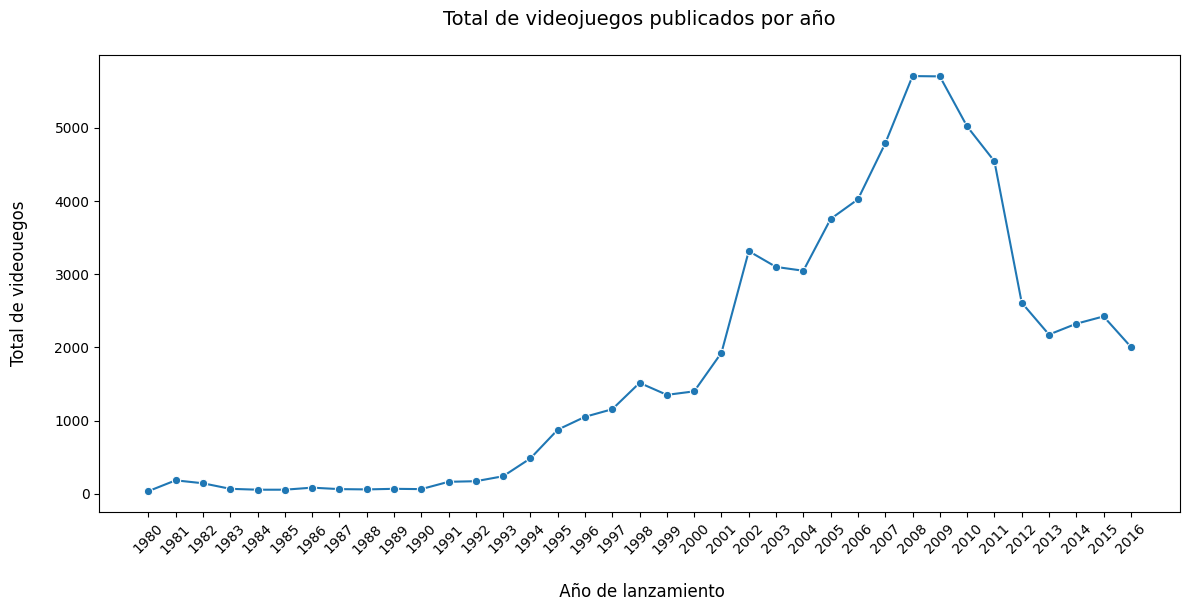

In [29]:
# Crear el gráfico cde líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x="year_of_release", y="total_games", data=games_year, marker="o")

# Personalizar el gráfico
plt.title("Total de videojuegos publicados por año\n", fontsize=14)
plt.xlabel("\n Año de lanzamiento", fontsize=12)
plt.ylabel("Total de videouegos\n", fontsize=12)
plt.tight_layout()

plt.xticks(ticks=games_year["year_of_release"], rotation=45)
# Mostrar el gráfico
plt.show()

In [30]:
games_year

,year_of_release,total_games
0,1980.0,36
1,1981.0,184
2,1982.0,144
3,1983.0,68
4,1984.0,56
5,1985.0,56
6,1986.0,84
7,1987.0,64
8,1988.0,60
9,1989.0,68


El lanzamiento de videojuegos muestra un desarrollo desde 1995, con un crecimiento constante que alcanza su primer pico en 1997-1998. Aunque se observa una leve disminución en 1999, el número de lanzamientos vuelve a crecer rápidamente, alcanzando un nuevo máximo en 2001-2002. 

De 2005 a 2008, el crecimiento es aún más pronunciado, marcando el punto más alto en 2008. Después de este año, la industria experimenta un descenso gradual hasta 2012, cuando el número de juegos registrados cae a aproximadamente la mitad. 

Es posible que esta caída este relacionada con la actualización de la base de datos, lo que es importante confirmar con el supervisor. Sin embargo, el patrón de crecimiento y caída puede también explicarse por la transición de nuevas plataformas en la industria de los videojuegos.

Sería interesante evaluar la progresión en el tiempo del desarrollo de los videojuegos. 